## Instituto Tecnológico de Costa Rica
## Escuela de Ingeniería Electrónica
## Maestría en Electrónica
## MP-6122 Reconocimiento de Patrones
## Investigación Corta 2 - Aprendizaje Supervisado
## Douglas Mora Ceciliano

### Escogiendo un set de datos:
Para esta investigación se eligió el set de datos Red Wine Quality el cual cuenta con una serie de características propias de los vinos y una calificación del 1 al 10 que define su calidad. El objetivo será entonces crear un modelo de aprendizaje que pueda aproximar el valor de calidad de los vinos utilizando únicamente sus características.

Fuente: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/downloads/red-wine-quality-cortez-et-al-2009.zip/2

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
Frame=pd.read_csv('winequality-red.csv')

### Etapa de pre procesado

Con el fin de obtener mejores resultados se procede a pre procesar los datos

#### Determinando tamaño del set de datos
A continuación se utiliza la función shape() para determinar el tamaño de nuestro set de datos.

In [2]:
print (' Filas Columnas')
print (Frame.shape)

 Filas Columnas
(1599, 12)


#### Limpiando Nulls
Utilizando el siguiente código buscaremos identificar si hay algún valor nulo en el set.

In [62]:
print('Identificacion de cantidad de valores nulos')
nNULL=Frame.isnull().sum()
print(nNULL)

Identificacion de cantidad de valores nulos
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Como se observa este set de datos no posee valores nulos por lo que está listo para ser utilizado.

#### Análisis Exploratorio
Procederemos a hacer un análisis exploratorio que nos permita ver como son nuestros datos.

Podemos utilizar el comando describe para tener un resumen de los valores estadísticos más relevantes

In [4]:
print(Frame.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

De acá podemos sacar conclusiones importantes, sin embargo muchas veces se prefiere un método más gráfico, para ello tenemos el siguiente código:

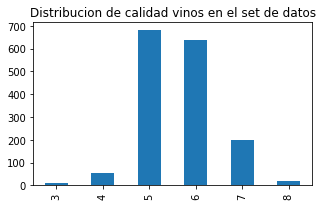

In [5]:
figure1=plt.figure(figsize=(5,3)) #(X,Y) pixeles
Frame.quality.value_counts(sort=0).plot(kind='bar', alpha=1, sort_columns='False')
plt.title('Distribucion de calidad vinos en el set de datos')
plt.show()

Podemos observar que los datos que tenemos poseen un distribución Gaussiana.

### Seleccionando los Datos a utilizar

Utilizaremos el código head para determinar el nombre de las columnas en nuestro set.

In [6]:
Frame.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Por ahora utilizaremos todas las columnas pues por ahora se desconoce el peso de cada una de las variables sobre la calidad del producto en específico.

#### Definiendo Features y Labels

Una parte fundamental del Aprendizaje supervisado es definir los Features de los Labels. Los primeros son tanto las entradas que utilizamos para probar como para testear nuestro sistema. Mientras que los segundos se usan para entrenar y evaluar el sistema.

Como se mencionó anteriormente la idea será determinar si es posible predecir el éxito la calidad de un vino rojo particular basándonos en sus características químicas.

A partir de esta premisa sabemos que nuestro Lable será la calidad y nuestros Features serán todas las demás características.


In [7]:
Label = Frame['quality']

Features = Frame[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]

### Análisis a partir de múltiples métodos supervisados:

Se escogieron 6 métodos de aprendizaje supervisado. Para comparar sus propiedades a continuación se muestran los resultados obtenidos para cada uno de ellos.

Antes de entrar en materia es importante comentar una característica particular de este tipo de métodos es que se requiere un grupo de datos para entrenar y un grupo de datos para Testear que el entrenamiento se ha llevado a cabo con éxito. Para ello utilizaremos la siguiente instrucción:

In [8]:
from sklearn.model_selection import train_test_split

Separaremos entonces nuestros features y labels en dos grupos uno de test y uno de train pero antes haremos un arreglo que nos ayudara a evaluar la capacidad de los métodos. Se reducirá el numero de clases de nuestro lable de 10 a 3.

Le llamaremos Lable2 y estara clasificada en:
    Baja calidad=0;
    Calidad Media=1;
    Alta calidad=2;
Para ello utilizaremos la función apply()

In [9]:
Label2=Label
Label2=Label2.apply(lambda x: 2 if x>6 else 1 if x>4 else 0)

Los resultados se aprecian en la figura generada con el siguiente codigo:

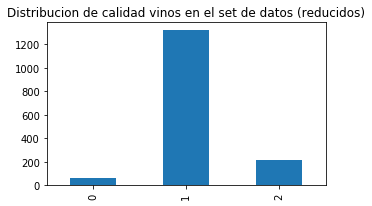

In [63]:
figure1=plt.figure(figsize=(5,3)) #(X,Y) pixeles
Label2.value_counts(sort=0).plot(kind='bar', alpha=1, sort_columns='False')
plt.title('Distribucion de calidad vinos en el set de datos (reducidos)')
plt.show()

Como se observa en Label2 se tienen menos clases. Pero por ahora se dejará esto de lado y se procederá a obtener los sets de prueba y test como se muestra a continuación.

In [11]:
X_train, X_test, Y_train, Y_test, Y2_train, Y2_test = train_test_split(Features, Label, Label2, random_state=27)

Una vez tenemos nuestros sets de entrenamiento y test listos se procede a la exploración de los diferentes métodos. Por las características de los datos del set se preferirá utilizar métodos de clasificación.

Para una comparación posterior se utilizara un Frame para Resultados.

In [12]:
First=pd.DataFrame()
Conc=pd.DataFrame()

### 1. KNN (K-Nearest Neighbors)

Este método permite clasificar los datos determinando los vecinos más cercanos para crear una línea de decisión que separe las diferentes clases.

Se procede a importar la función KNeighborsClassifier. Si el set de datos fuera del tipo regresión se debería utilizar KNeighborsRegressor

In [13]:
from sklearn.neighbors import KNeighborsClassifier

La libreria matplotlib.pyplot permitira graficar los datos.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Se definen listas para guardar los datos de presicion y posteriormente graficarlos.

In [15]:
training_accuracy = []
test_accuracy = []

Se define un rango para los hiperparametros. En el caso del KNNC el hiperparametro mas relevante es el numero de vecinos a detectar.

In [16]:
neighbors_settings = range(1, 30)

Se populan las listas de presicion con los datos de varios hiper-parametros utilizando el siguiente ciclo:

In [17]:
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, Y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, Y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, Y_test))

Usando los datos obtenidos anteriormente, se procede a graficar la precicion del entrenamiento (que tan bien funciona el modelo descrito para los datos de entrenamiento) vs la precision de la prediccion (que tan bien generaliza el modelo obtenido, las caracteristicas del set). El objetivo de la grafica es determinar el valor ideal del hiper-parametro para no tener ni overfit ni underfit.

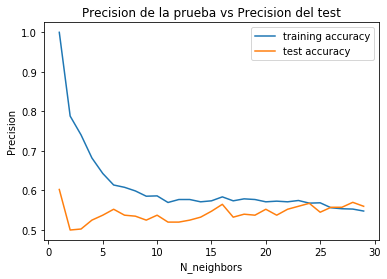

In [18]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("N_neighbors")
plt.title("Precision de la prueba vs Precision del test")
plt.legend()

Como se obserba los resultados son bastante malos, el mejor caso se da con 24 vecinos y no es superior a 60%.

In [19]:
KNN = KNeighborsClassifier(n_neighbors=24)
KNN.fit(X_train, Y_train)
KNNS=KNN.score(X_test, Y_test)
First['KNN']=[KNNS]

Se utilisa el mismo codigo buscando mejorar la presicion del modelo. Con este fin usaremos el Lable2 definido previamente. Se espera que al reducir las clases a 3 se logre un buen resultado, pues sera mas facil para el algoritmo diferenciarlas.

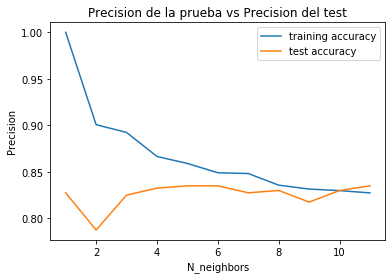

In [20]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 12)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, Y2_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, Y2_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, Y2_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("N_neighbors")
plt.title("Precision de la prueba vs Precision del test")
plt.legend()

Se obserba un incremento significativo de la presicion al tener menos clases. El mejor resultado se obtiene con 10 iteraciones y es de 83%.

In [21]:
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train, Y2_train)
KNNS=KNN.score(X_test, Y2_test)
print("Precision Test KNN: {:.3f}".format(KNNS))

Precision Test KNN: 0.830


Guardamos nuestro resultado:

In [22]:
Conc['KNN']=[KNNS]

### 2. Naive Baye

Se procede a importar las librerias para el metodo Naive Baye (Se utiliza el Gaussian Naive Bayes). Este metodo tiene la particularidad de no requerir hiperparametros.

In [23]:
from sklearn.naive_bayes import GaussianNB

Se procede a hacer el fit con el metodo seleccionado

In [24]:
nbg = GaussianNB().fit(X_train, Y_train)

Se calcula la presicion del test vs la precision de la prediccion;

In [25]:
print("Entrenamiento: {:.3f}".format(nbg.score(X_train, Y_train)))
print("Prueba: {:.3f}".format(nbg.score(X_test, Y_test)))

Entrenamiento: 0.566
Prueba: 0.585


Una vez mas los resultados son bastante malos para nuestro Lable con muchas clases. Los mismos se gruardan para comparar en la seccion de conclusiones.

In [26]:
NB=nbg.score(X_test, Y_test)
First['NB']=[NB]

Se procede a usar el de 3 clases esperando obtener mejores resultados.

In [27]:
nbg = GaussianNB().fit(X_train, Y2_train)
print("Entrenamiento: {:.3f}".format(nbg.score(X_train, Y2_train)))
NB=nbg.score(X_test, Y2_test)
print("Prueba: {:.3f}".format(NB))

Entrenamiento: 0.791
Prueba: 0.800


Como era de esperar los resultados mejoraron significativamente sin embargo no superan a KNN.

Guardamos el resultado

In [28]:
Conc['NB']=[NB]

### 3. Arbol de decision:

Este metodo busca organizar la informacion en un arbol de profundidad N que permita luego clasificar los resultados y realizar la prediccion. Se procede a importar el metodo.

In [29]:
from sklearn.tree import DecisionTreeClassifier

Se utiliza un ciclo para determinar la profundidad de arbol que obtenga los mejores resultados.

In [30]:
training_accuracy = []
test_accuracy = []
Tree_settings=range(1,10)
for prof in Tree_settings:
    DecisionTreeModel = DecisionTreeClassifier(max_depth=prof)
    DecisionTreeModel.fit(X_train, Y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(DecisionTreeModel.score(X_train, Y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(DecisionTreeModel.score(X_test, Y_test))

Se procede a graficar los resultados

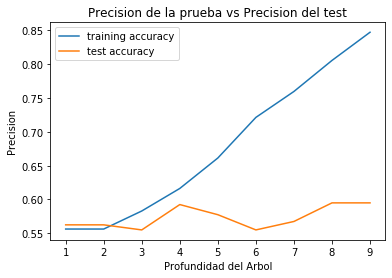

In [31]:
plt.plot(Tree_settings, training_accuracy, label="training accuracy")
plt.plot(Tree_settings, test_accuracy, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("Profundidad del Arbol")
plt.title("Precision de la prueba vs Precision del test")
plt.legend()

Una vez mas los resultados no son muy prometedores. El mejor resultado obtenido es obtenido con una profundidad de 4 aproximadamente 60%

In [32]:
DecisionTreeModel = DecisionTreeClassifier(max_depth=4)
DecisionTreeModel.fit(X_train, Y_train)
First['DT']=[DecisionTreeModel.score(X_test, Y_test)]

Se tratara nuevamente utilizando nuestro set con menos clases.

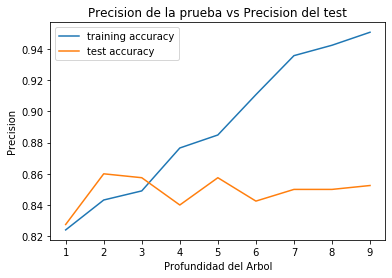

In [33]:
training_accuracy = []
test_accuracy = []
Tree_settings=range(1,10)
for prof in Tree_settings:
    DecisionTreeModel = DecisionTreeClassifier(max_depth=prof)
    DecisionTreeModel.fit(X_train, Y2_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(DecisionTreeModel.score(X_train, Y2_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(DecisionTreeModel.score(X_test, Y2_test))
plt.plot(Tree_settings, training_accuracy, label="training accuracy")
plt.plot(Tree_settings, test_accuracy, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("Profundidad del Arbol")
plt.title("Precision de la prueba vs Precision del test")
plt.legend()

Se observa una mejora significativa en la precision. El mejor resultado se obtiene con una profundidad de 3 y se obtiene aproximadamente 85% de precision.

In [34]:
DecisionTreeModel = DecisionTreeClassifier(max_depth=3)
DecisionTreeModel.fit(X_train, Y2_train)
DT=DecisionTreeModel.score(X_test, Y2_test)
print("Mejor porcentaje de prediccion prediccion: {:.3f}".format(DT))

Mejor porcentaje de prediccion prediccion: 0.858


Guardamos el resultado

In [35]:
Conc['DT']=[DT]

Algo interesante que se puede hacer con los arboles de Decision es visualizarlo de forma grafica para asi determinar la importancia que asigna a cada feature. Para ello utilizamos la siguente funcion.

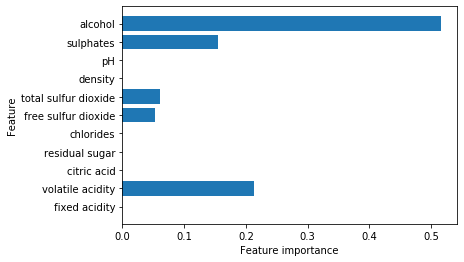

In [36]:
def plot_feature_importances(model):
    n_features = Features.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances(DecisionTreeModel)

Podemos observar que el algoritmo determino que el alcohol tiene gran relevancia en la calidad del vino

### 4. Random Forest:
Este metodo es del tipo ensamble utiliza se basa en el metodo de arboles de decision para luego estimar mediante una votacion (por ser el caso de clasificacion) la mayoria gana. Procedemos a importar el modelo:

In [37]:
from sklearn.ensemble import RandomForestClassifier

Para este caso el hiperparametro de mayor interes es el numero de estimadores que esta relacionado de manera directa con el numero de arboles que se usaran. Para ello usaremos el siguiente ciclo:

In [38]:
training_accuracy = []
test_accuracy = []
Tree_settings=range(1,25)
for nestimator in Tree_settings:
    RFModel = RandomForestClassifier(n_estimators=nestimator)
    RFModel.fit(X_train, Y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(RFModel.score(X_train, Y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(RFModel.score(X_test, Y_test))

Y ahora se grafican los resultados

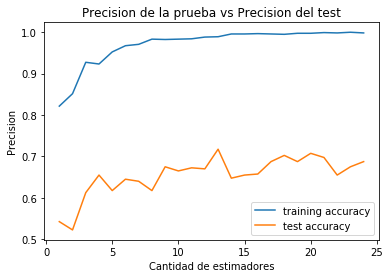

In [39]:
plt.plot(Tree_settings, training_accuracy, label="training accuracy")
plt.plot(Tree_settings, test_accuracy, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("Cantidad de estimadores")
plt.title("Precision de la prueba vs Precision del test")
plt.legend()

Se observa que para este metodo en especifico la presiccion de la prediccion mejora con respecto a un Arbol de decision sin embargo se tiene overfit en todo el rango.

In [40]:
RFModel = RandomForestClassifier(n_estimators=15)
RFModel.fit(X_train, Y_train)
First['RF']=[RFModel.score(X_test, Y_test)]

Provaremos con el set de menos clases

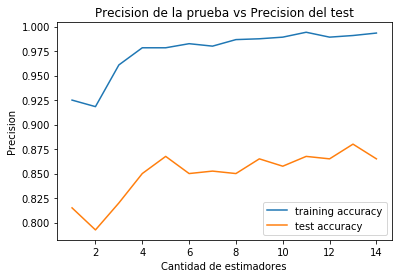

In [41]:
training_accuracy = []
test_accuracy = []
Tree_settings=range(1,15)
for nestimator in Tree_settings:
    RFModel = RandomForestClassifier(n_estimators=nestimator)
    RFModel.fit(X_train, Y2_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(RFModel.score(X_train, Y2_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(RFModel.score(X_test, Y2_test))
plt.plot(Tree_settings, training_accuracy, label="training accuracy")
plt.plot(Tree_settings, test_accuracy, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("Cantidad de estimadores")
plt.title("Precision de la prueba vs Precision del test")
plt.legend()

Con 13 estimadores se obtiene el mejor resultado en la prediccion, un valor muy cercano a 86%% pero se sigue teniendo lo que se consideraria overfit. Parece que esta es una propiedad del test y que la comparacion entre la presicion del test y del training no es la mejor forma de evaluar a este metodo particular.

#### Metodos de ensamble:
Los metodos de ensamble se basan en la idea de crear varios modelos distintos y posteriormente ponerlos a votar. La filosofia es similar a una democracia pues lo que diga la mayoria es es lo que se decide. Cada uno de estos modelos pequeños se conoce con el nombre de estimador y el conjunto de estimadores es lo que se conoce como ensamble. El objetivo es que cada estimador de su aporte al conjunto alcanzando en general niveles mas altos de precision.

In [42]:
RFModel = RandomForestClassifier(n_estimators=13)
RFModel.fit(X_train, Y2_train)
RF=DecisionTreeModel.score(X_test, Y2_test)
print("Mejor porcentaje de prediccion prediccion: {:.3f}".format(RF))

Mejor porcentaje de prediccion prediccion: 0.858


Guardamos el resultado

In [43]:
Conc['RF']=[RF]

Nos gustaria ver la importancia asignada a cada valor para ello usaremos la funcion que definimos en el punto anterior.

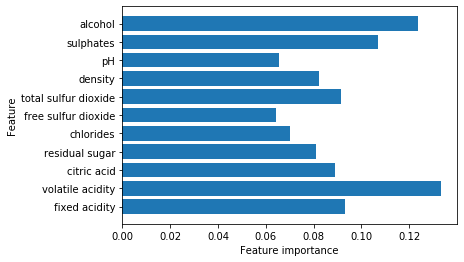

In [44]:
plot_feature_importances(RFModel)

Se obserba que la sensacion de alcohol y la acidez del vino son factores gran importancia de la misma forma que en el metodo de Arbol de decision pero en este caso el resto de los Features tambien juegan un rol importante en la clasificacion.

### 5. AdaBost:
Este metodo de la clase ensamble busca hacer un primer fit con los datos y a partir de los resultados que fallan busca ajustar los pesos de forma que se aumente la presicion.

Procederemos a importar el metodo

In [45]:
from sklearn.ensemble import AdaBoostClassifier

Buscaremos el mejor fit variando el hiperparametro que define el numero de estimadores de forma similar a como se hizo con el Random Forest

In [46]:
training_accuracy = []
test_accuracy = []
Ada_settings=range(1,10)
for nestimator in Ada_settings:
    ABModel = AdaBoostClassifier(n_estimators=nestimator)
    ABModel.fit(X_train, Y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(ABModel.score(X_train, Y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(ABModel.score(X_test, Y_test))

Se procede a graficar los resultados:

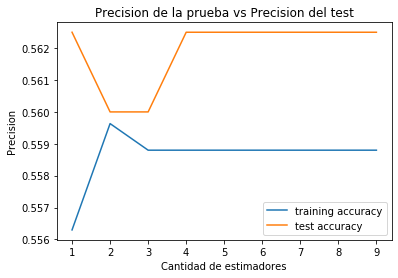

In [47]:
plt.plot(Ada_settings, training_accuracy, label="training accuracy")
plt.plot(Ada_settings, test_accuracy, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("Cantidad de estimadores")
plt.title("Precision de la prueba vs Precision del test")
plt.legend()

Los resultados son bastante malos. El mejor fue obtenido con 2 estimadores.

In [48]:
ABModel = AdaBoostClassifier(n_estimators=2)
ABModel.fit(X_train, Y_train)
First['AB']=[ABModel.score(X_test, Y_test)]

Se procede a probar con nuestro set con menos clases.

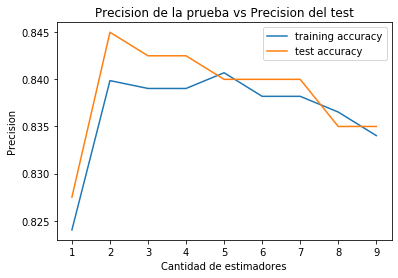

In [49]:
training_accuracy = []
test_accuracy = []
Ada_settings=range(1,10)
for nestimator in Ada_settings:
    ABModel = AdaBoostClassifier(n_estimators=nestimator)
    ABModel.fit(X_train, Y2_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(ABModel.score(X_train, Y2_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(ABModel.score(X_test, Y2_test))
plt.plot(Ada_settings, training_accuracy, label="training accuracy")
plt.plot(Ada_settings, test_accuracy, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("Cantidad de estimadores")
plt.title("Precision de la prueba vs Precision del test")
plt.legend()

Como se observa el mejor resultado fue obtenido en este caso con 5 estimadores y fue de 83.5%

In [50]:
ABModel = AdaBoostClassifier(n_estimators=nestimator)
ABModel.fit(X_train, Y2_train)
AB=ABModel.score(X_test, Y2_test)
print ("Mejor porcentaje de prediccion prediccion: {:.3f}".format(AB))

Mejor porcentaje de prediccion prediccion: 0.835


Guardamos el resultado

In [51]:
Conc['AB']=[AB]

Para ver que pesos asigna utilizaremos nuestro algoritmo previamente definido:

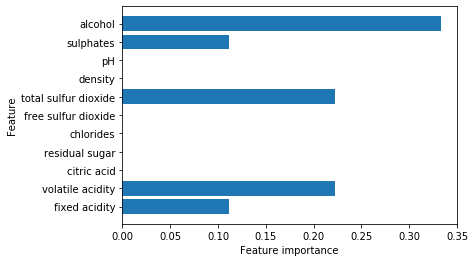

In [52]:
plot_feature_importances(ABModel)

### 6. BaggingClassifier:
Este metodo de ensamble separa la informacion en un numero dado de subsets y posteriormente predice en base a la respuesta de los distintos grupos. Para el metodo de clasificacion se hace una votacion.

Se procede a importar el metodo

In [53]:
from sklearn.ensemble import BaggingClassifier

Una vez mas buscaremos el mejor fit variando uno de los hiperparametros en este caso el numero de estimadores.

In [54]:
training_accuracy = []
test_accuracy = []
BC_settings=range(1,25)
for nestimator in BC_settings:
    BCModel = BaggingClassifier(n_estimators=nestimator)
    BCModel.fit(X_train, Y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(BCModel.score(X_train, Y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(BCModel.score(X_test, Y_test))

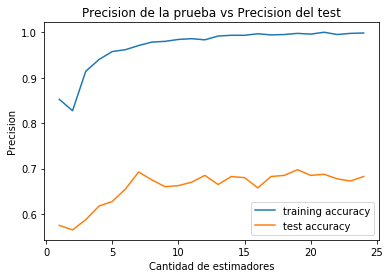

In [55]:
plt.plot(BC_settings, training_accuracy, label="training accuracy")
plt.plot(BC_settings, test_accuracy, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("Cantidad de estimadores")
plt.title("Precision de la prueba vs Precision del test")
plt.legend()

 Utilizando 10 estimadores se logra aproximadamente un 70% de presicion en la prueba pero se tiene overfit.

In [56]:
BCModel = BaggingClassifier(n_estimators=2)
BCModel.fit(X_train, Y_train)
First['BC']=[BCModel.score(X_test, Y_test)]

 Procederemos a probar nuestro set de 3 clases con el fin de ver si es posible obtener mejores resultados:

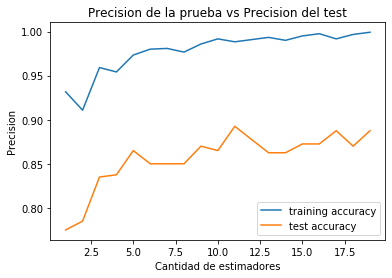

In [57]:
training_accuracy = []
test_accuracy = []
BC_settings=range(1,20)
for nestimator in BC_settings:
    BCModel = BaggingClassifier(n_estimators=nestimator)
    BCModel.fit(X_train, Y2_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(BCModel.score(X_train, Y2_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(BCModel.score(X_test, Y2_test))
plt.plot(BC_settings, training_accuracy, label="training accuracy")
plt.plot(BC_settings, test_accuracy, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("Cantidad de estimadores")
plt.title("Precision de la prueba vs Precision del test")
plt.legend()

El mejor fit se obtiene con 17 estimadores como se observa a continuacion.

In [58]:
BCModel = BaggingClassifier(n_estimators=17)
BCModel.fit(X_train, Y2_train)
BC=BCModel.score(X_test, Y2_test)
print ("Mejor porcentaje de prediccion prediccion: {:.3f}".format(BC))

Mejor porcentaje de prediccion prediccion: 0.875


Guardamos el resultado

In [59]:
Conc['BC']=[BC]

## Comparaciones y conclusiones

En esta sección utilizaremos nuestros resultados obtenidos para discutir las capacidades y limitaciones de los sets de datos utilizados.

Primeramente, procederemos a imprimir nuestra matriz con los resultados de predicción.

<Figure size 1080x720 with 0 Axes>

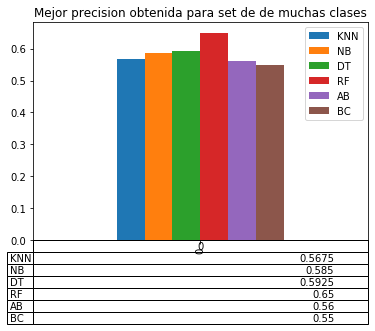

In [60]:
figure1=plt.figure(figsize=(15,10)) #(X,Y) pixeles
First.plot(kind='bar', alpha=1, table=True)
plt.title('Mejor precision obtenida para set de de muchas clases')
plt.show()

<Figure size 1080x720 with 0 Axes>

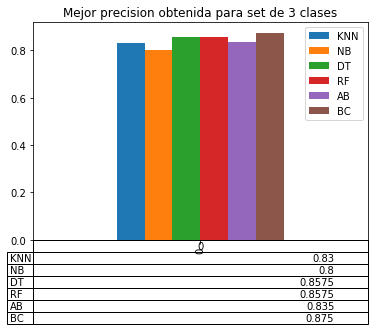

In [61]:
figure1=plt.figure(figsize=(15,10)) #(X,Y) pixeles
Conc.plot(kind='bar', alpha=1, table=True)
plt.title('Mejor precision obtenida para set de 3 clases')
plt.show()

Se observa que el metodo Random Forest obtuvo por mucho la mayor puntuación para el set de muchas clases acercándose al 70% mientras que al reducir la cantidad de clases en relación otros métodos empiezan a aumentar su precisión. Para nuestro set con 3 clases el método de Bagging incluso llega a superar al Random Forest.

Parece que los métodos de ensamble tienen un pseudo overfit por lo que otras formas de evaluación deben ser aplicadas

Para este set en particular los métodos aplicados fueron de clasificación, pero ver el problema como uno de regresión podría arrojar resultados distintos.